## Load a triangle mesh

You can load triangle meshes from `.ply` or `.obj` files using the function `bff.load_mesh`. You can then plot them using the method `plot`.

In [1]:
from bff import load_mesh

In [2]:
mesh = load_mesh('Samples/face.obj')

In [3]:
mesh.plot()

## Reorder the vertices

To use the Boundary First Flattening algorithm, you have to specify exterior angles or scale factors for each boundary vertex. For this, you first have to reorder the vertices using the method `reorder`. This will find the boundary of the mesh and do the following:

- The attributes `b_num` and `i_num` will be added to the object `mesh`, containing the number of boundary and interior vertices, respectively.
- The vertices of the triangle mesh (stored under `mesh.v`) will be reordered such that:
    - The interior vertices come before the boundary ones.
    - The boundary vertices are ordered such that consecutive boundart vertices are connected by a boundary edge.

In [4]:
mesh.reorder()
mesh.b_num

168

## Specify boundary data and flatten the mesh

Note that if you want to flatten the mesh by specify exterior angles, these have to add up to $2\pi$.

In [5]:
from numpy import pi

In [6]:
# Example exterior angles
k = [2*pi/mesh.b_num for _ in range(mesh.b_num)]

# Example scale factors
u = [0 for _ in range(mesh.b_num)]

## Flatten the mesh

To flatten the mesh with respect to your boundary data, use the method `flatten`. This will create a new object that can be plotted in 2d using the method `plot` or be written to a `.ply` or `.obj` file using the method `write_to`. 

In [7]:
flat_face = mesh.flatten(k)   # Specifying exterior angles

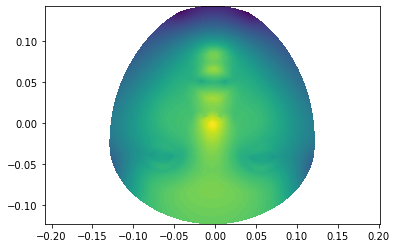

In [8]:
flat_face.plot()

In [9]:
flat_face.write_to('Samples/flat_face.obj')

File written succesfully


By default, `flatten` expects to be handed exterior angles. To use scale factors instead, use the keyword argument `scale_factors=True`.

In [10]:
another_flat_face = mesh.flatten(u, scale_factors=True)

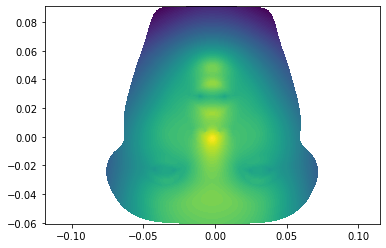

In [11]:
another_flat_face.plot()

## Sharp corners

The exterior angles `k` are by default not necessarrily realised, but only approximated. If you want to realise the exterior precisely, for example if you have specified sharp corners, you can call the method `flatten` with the keyword argument `holomorphic=False`:

In [12]:
k = ([pi/2] + [0]*41)*4   # Recall that mesh.b_num = 168 = 42*4

In [13]:
square_face = mesh.flatten(k, holomorphic=False)

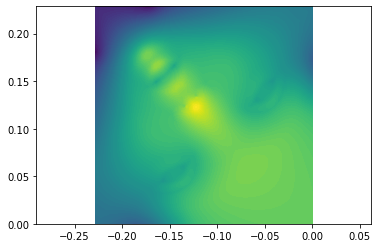

In [14]:
square_face.plot()

## Uniformization

To flatten the triangle mesh to a disk, you can use the method `uniformize`. You don't have to reorder the vertices before using this method, since you don't assign boundary data to individual vertices, but if not done before, this will be done in the process.

In [15]:
round_face = mesh.uniformize()

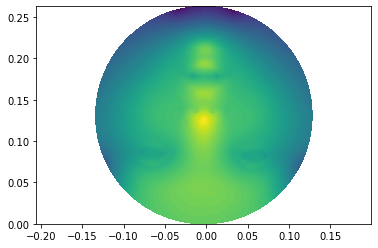

In [16]:
round_face.plot()

## Cut the mesh

The `TriMesh` class also contains methods that either remove or cut out from the mesh all vertices in a given range around a specified vertex. These are the methods `cut` and `cut_out`, respectively.

Note that the Boundary First Algorithm only works for disk-like meshes. For a rough indication, you can compute the Euler characteristic of the mesh using the method `euler_char`.

In [17]:
bunny = load_mesh('Samples/bunny.obj')

In [18]:
bunny_head = bunny.cut_out(1, 50)
bunny_head.euler_char()

1

In [19]:
bunny_head.plot()

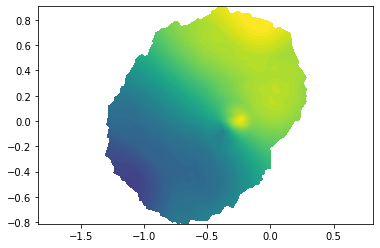

In [20]:
bunny_head.reorder()

s = [0] * bunny_head.b_num   # Generate scale factor data

flat_head = bunny_head.flatten(s, scale_factors=True)
flat_head.plot()

In [21]:
bunny_with_hole = bunny.cut(0, 30)
bunny_with_hole.euler_char()

1

In [22]:
bunny_with_hole.plot()

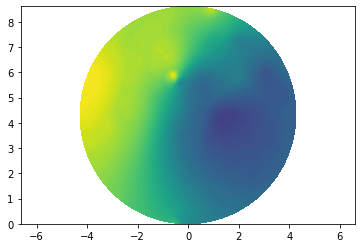

In [23]:
flat_bunny = bunny_with_hole.uniformize()
flat_bunny.plot()

## Specify a boundary curve

You can also flatten the mesh to a prescribed form by specifying a closed boundary curve in form of a Python function. Note, however, that the curve has to be oriented and in arc-length parametrization. 

As an example, you can find an arc-length parametrized version of the curve $(\cos(t)^3, \sin(t)^3)$ under `bff.example_curve`. To flatten the mesh, call the method `flatten_to_curve` and hand over the curve and its length (in our case this is 6): 

In [24]:
from bff import example_curve

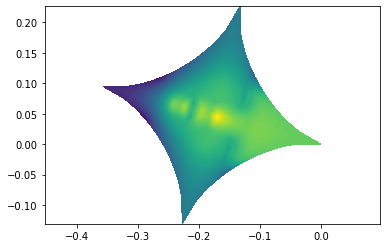

In [25]:
spiky_face = mesh.flatten_to_curve(example_curve, 6, 20)
spiky_face.plot()

You can specify the number of iterations used to fit the mesh into the curve by calling the method with a third argument. The number of iterations defaults to 20.

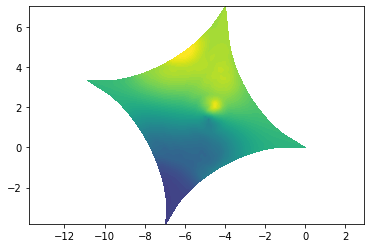

In [26]:
spiky_head = bunny_head.flatten_to_curve(example_curve, 6, 40)
spiky_head.plot()